[[162.0, 388.0], [160.0, 386.5], [161.5, 385.0], [161.5, 385.5], [163.0, 387.5], [163.5, 387.5], [162.0, 386.0], [162.5, 386.5], [165.5, 385.0], [165.5, 385.0], [166.0, 384.0], [164.5, 382.0], [163.5, 380.0], [163.0, 380.5], [162.5, 378.5], [161.5, 376.0], [162.0, 375.5], [161.0, 377.0], [160.0, 375.0], [155.5, 365.0], [156.5, 364.5], [155.5, 362.5], [155.5, 359.0], [156.5, 353.0], [156.5, 346.0], [159.0, 338.5], [160.0, 331.5], [162.0, 339.5], [160.0, 332.0], [159.5, 334.5], [159.0, 335.0], [159.5, 330.0], [160.0, 338.0], [159.0, 335.0], [159.0, 332.5], [162.5, 321.0], [164.0, 320.5], [166.0, 321.0], [163.5, 316.5], [165.5, 317.5], [167.0, 316.0], [174.5, 314.5], [174.0, 315.5], [239.0, 285.0], [236.0, 287.5], [255.5, 284.0], [262.5, 284.0], [261.0, 286.0], [302.0, 287.5], [306.5, 288.0], [313.5, 292.0], [323.0, 294.0], [324.5, 295.5], [341.0, 297.0], [344.0, 294.5], [346.0, 295.5], [347.0, 295.5], [349.0, 292.0], [348.5, 292.5], [370.0, 301.5], [368.0, 304.0], [364.0, 306.5], [356.5,

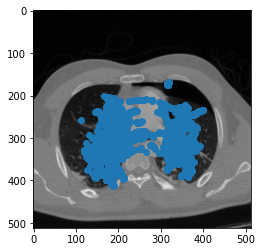

e_step
m_step
e_step
m_step
e_step
m_step
e_step
m_step
e_step
m_step
e_step
m_step
e_step
m_step
e_step
m_step
e_step
m_step
e_step
m_step
e_step
m_step
err_mu: -0.00  err_sigma: 0.00  err_alpha: 0.00
[[184.6038  307.65283]
 [342.32983 312.35837]]
[matrix([[ 469.20557482, -261.80391687],
        [-261.80391687, 2066.32902361]]), matrix([[ 358.23605761,   36.33366422],
        [  36.33366422, 1467.17963146]])]
[0.5271547226602751, 0.4728452773397248]
2379.306302240195
1814.9728581876166


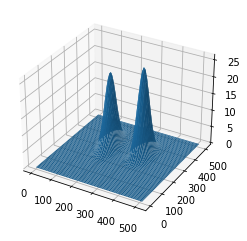

[[212. 352.]
 [317. 350.]
 [341. 289.]
 [370. 279.]
 [354. 301.]
 [185. 288.]
 [341. 380.]
 [348. 294.]
 [214. 333.]
 [183. 373.]
 [221. 256.]
 [170. 281.]
 [373. 234.]
 [349. 368.]
 [356. 291.]
 [327. 319.]
 [329. 283.]
 [336. 331.]
 [360. 325.]
 [347. 273.]
 [187. 308.]
 [193. 287.]
 [194. 286.]
 [182. 339.]
 [209. 277.]
 [331. 364.]
 [179. 215.]
 [169. 341.]
 [343. 259.]
 [181. 388.]
 [203. 309.]
 [349. 329.]
 [341. 325.]
 [321. 322.]
 [370. 306.]
 [322. 348.]
 [324. 345.]
 [183. 281.]
 [363. 312.]
 [318. 298.]
 [386. 295.]
 [144. 353.]
 [345. 297.]
 [172. 268.]
 [350. 357.]
 [120. 325.]
 [335. 325.]
 [384. 346.]
 [338. 303.]
 [170. 310.]
 [361. 298.]
 [187. 335.]
 [158. 329.]
 [178. 325.]
 [156. 340.]
 [191. 261.]
 [341. 297.]
 [140. 325.]
 [358. 276.]
 [202. 184.]
 [378. 343.]
 [317. 351.]
 [367. 318.]
 [340. 279.]
 [167. 320.]
 [322. 322.]
 [199. 242.]
 [185. 362.]
 [310. 274.]
 [156. 335.]
 [188. 315.]
 [335. 242.]
 [176. 353.]
 [307. 269.]
 [290. 292.]
 [190. 333.]
 [368. 303.]

In [7]:
# %load sampling/sample.py
import numpy as np
from numpy.linalg import cholesky
import json
from sampling import gmm_em
import matplotlib.pyplot as plt


def sample_from_gaussian(mu, sigma, sample_No=1000):
    """
    Sampling from a Gaussian model
    :param mu: the mean of gaussian model
    :param sigma: the variance of gaussian model
    :param sample_No: the number of points that will sample from gaussian model
    :return: the sampled points
    """
    R = cholesky(sigma)
    s = np.dot(np.random.randn(sample_No, 2), R) + mu
    return s


def sample_from_uniform(alpha_vec):
    """
    sampling from a uniform
    :param alpha_vec: the probability each gaussian model being selected
    :return: the index of selected gaussian model
    """
    x = np.random.rand()
    total = 0
    index = -1
    for ids, a in enumerate(alpha_vec):
        if x >= total and (x < (total + a)):
            index = ids
            break
        else:
            total += a
    return index


def sample_from_mixture_gaussian(alpha, mu, sigma, sample_No=1000):
    """
    sampling from gaussian mixture model
    :param alpha: the weights of each gaussian model
    :param mu: the mean of each gaussian model
    :param sigma: the variance of each gaussian model
    :param sample_No: the number of points that will sample from gaussian mixture model
    :return: the sampled points
    """
    points = []
    for ids in range(sample_No):
        gaussian_ids = sample_from_uniform(alpha)
        p = sample_from_gaussian(mu[gaussian_ids], sigma[gaussian_ids], sample_No=1)
        points.append(p[0])
    points = np.round(points)
    # If the coordinate is repeatedly selected, then it is rejected.
    points = list(set([tuple(t) for t in points]))
    return np.array(points)


def plot_object_distribution(points, image):
    """
    plot the location distribution of objects on the image
    :param points: objects' center coordinates
    :param image: background image
    :return:
    """
    plt.scatter(points[:, 0], points[:, 1])
    plt.imshow(image)
    plt.show()


if __name__ == "__main__":
    f = open("annotations/instances_all.json")
    data = json.load(f)
    annotations = data["annotations"]
    centers = []
    for ann in annotations:
        bbox = ann["bbox"]
        y = bbox[0] + bbox[2] / 2
        x = bbox[1] + bbox[3] / 2
        centers.append([x, y])
    print(centers)
    centers = np.asarray(centers)
    image = plt.imread("images/01123.jpg")
    plot_object_distribution(centers, image)
    gmm = gmm_em.GMM(centers)
    gmm.em_algorithm(100, 0.0001)
    print(gmm.mu)
    print(gmm.sigma)
    print(gmm.alpha)
    gmm_em.plot_gmm(gmm)
    alpha = np.array(gmm.alpha)
    mu = np.array(gmm.mu)
    sigma = np.array(gmm.sigma)
    points = sample_from_mixture_gaussian(alpha, mu, sigma, sample_No=100)
    np.savetxt("locations/sample_points.txt", points, fmt="%d")
    print(points)


